# Coverage plots

In [3]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt

Let us consider the following function which applies a linear model to the given data. 
Specifically, given a "model" vector containing the model coefficients $(a,b)$ and a $n \times 2$ "data" matrix  containing the data points to be classified, the function outputs a vector $\mathbf{z}$, $|\mathbf{z}| = n$ of booleans where $z_i$ is `True` if $a \cdot x_{i,1} + b \cdot x_{i,2} \geq 0$, it is `False` otherwise.

In [4]:
def apply_linear_model(model, data):
    return np.dot(data, np.transpose(model)) > 0

Let us define `data` by generating $1000$ points drawn uniformly from $\mathcal{X} = [-100,100]^2$.

In [5]:
data = (np.random.rand(1000,2) - 0.5) * 200
data

array([[-84.30442096, -26.59411495],
       [ 96.66626817, -89.31562998],
       [ 29.52064858, -20.67145993],
       ...,
       [-44.63821577, -50.93723694],
       [-62.88554683, -67.87652614],
       [-95.72830974,  49.8296387 ]])

and let target_labels be the labeling output by applying `apply_linear_model` with our target model: $4x -y > 0$

In [6]:
target_model = [4.,-1.]
target_labels = apply_linear_model(target_model, data)
target_labels

array([False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,

By using matplotlib.pyplot module it is easy to plot the generated points onto a 2D plot:

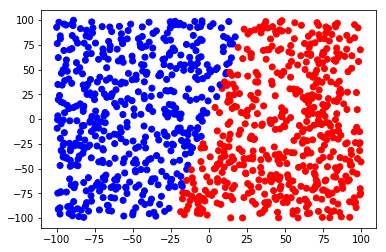

In [7]:
colors = ['r' if l else 'b' for l in target_labels] # R se è true, b se è false.
plt.scatter(data[:,0], data[:,1], color=colors)

Finally let us now generate at random 100 linear models with coefficients in $[-5,5]$:

In [8]:
models = (np.random.rand(100,2) - 0.5) * 10

# Exercise

1. Write a function that, taken two list of labellings build the corresponding confusion matrix [[1](#hint1)];
1. For each model in `models` plot the [FP,TP] pairs on a scatter plot;
1. Just looking at the plot: which is the best model in the pool?
1. Find the model with the best accuracy [[2](#hint2)] and compare it with the target model, is it close? Is it the model you would have picked up visually from the scatter plot?
1. If everything is ok, you should have found a pretty good model for our data. It fits the data quite well and it is quite close to the target model. Did you expect this? If so, why? If not so, why not?

<a name="hint1">Hint 1:</a> it may be helpful to have a way to map TRUE to 0, FALSE to 1 and to use these values as indices in the confusion matrix. 

<a name="hint2">Hint 2:</a> one way to proceed is to build a function `accuracy`, use the `map` function to calculate the accuracies of all the models, and then apply the `numpy.argmax` to retrieve the index of the best model.

# 1. Funzione che realizza una matrice di confusione.

In [9]:
def compute_confusion_matrix(actual, predicted): # Dichiarazione della funzione e dichiarazione dei parametri.
    k = len(np.unique(actual)) # Si calcola la lunghezza dell'array (numero delle classi).
    result = np.zeros((k, k)) # Si dichiara un'array con le dimensioni appropiate.
    for i in range(len(actual)): # Si loopa sull'array.
        result[actual[i]][predicted[i]] += 1 # Si incrementa la posizione dell'array result corrispondente.
    return result # Si restituisce il risultato.

In [15]:
def compute_confusion_matrix2(actual, predicted): # Dichiarazione della funzione.
    unique = np.unique(actual) # Un'array contentente le label presenti in actual.
    k = len(unique)# Si cerca la dimensione dell'array.
    result = np.zeros((k, k)) # Dichiarazione dell'array.
    imap = {key: i for i, key in enumerate(unique)} # Mapping per le labels.
    #print(imap)
    for p, a in zip(predicted, actual): # Loop su tutte le coppie actual e predicted.
        result[imap[p]][imap[a]] += 1 # Si incrementa la posizione della matrice interessata.
    return result

Esempio di utilizzo della funzione compute_confusion_matrix.

In [16]:
true_labels = [2, 0, 2, 2, 0, 1]
predicted_labels = [0, 0, 2, 2, 0, 2]
result = compute_confusion_matrix(true_labels, predicted_labels)
result

array([[2., 0., 0.],
       [0., 0., 1.],
       [1., 0., 2.]])

L'array result deve essere interpretato in questo modo:
1. Il numero delle classi è 3: 0, 1, 2;
1. La classe "0" è stata predetta come "0" 2 volte, come "1" 0 volte, come "2" 0 volte.
1. La classe "1" è stata predetta come "0" 0 volte, come "1" 0 volte, come "2" 1 volta.
1. La classe "2" è stata predetta come "0" 1 volta, come "1" 0 volte, come "2" 2 volte. 

In [17]:
result2 = compute_confusion_matrix2(target_labels, target_labels)
result2

array([[493.,   0.],
       [  0., 507.]])

L'indice 0 sono i False, mentre l'indice 1 sono i True.

Esempio con SKLearn.

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_labels, predicted_labels)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [19]:
confusion_matrix(target_labels, target_labels, labels=[True, False])

array([[507,   0],
       [  0, 493]], dtype=int64)

In questo caso, invece, l'indice 0 sono i True, mentre l'indice 1 i False.

In [20]:
from collections import Counter
print(Counter(target_labels))

Counter({True: 507, False: 493})


# 2. Plotta lo scatter [FP, TP]

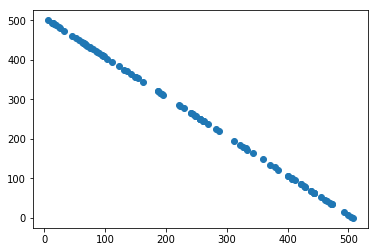

In [21]:
matrix = np.empty((100, 2))
i = 0
for m in models:
    m_labels = apply_linear_model(m, data)
    result = compute_confusion_matrix2(target_labels, m_labels)
    tn = result[0, 0]
    tp = result[1, 1]
    fp = result[0, 1]
    fn = result[1, 0]
    matrix[i] = [fp, tp]
    i += 1
    
plt.scatter(matrix[:,0], matrix[:,1])

In SKLearn

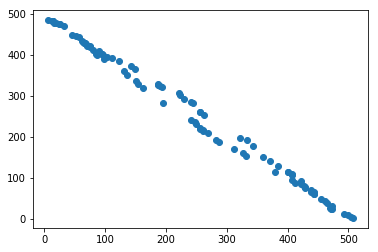

In [22]:
matrix2 = np.empty((100, 2))
i = 0
for m in models:
    m_labels = apply_linear_model(m, data)
    #tp, fn, fp, tn = confusion_matrix(target_labels, m_labels, labels=[True, False]).ravel()
    result = confusion_matrix(target_labels, m_labels, labels=[True, False])
    tn = result[0, 0]
    tp = result[1, 1]
    fp = result[0, 1]
    fn = result[1, 0]
    matrix2[i] = [fp, tp]
    i += 1

plt.scatter(matrix2[:,0], matrix2[:,1])

# 3. Qual è il migliore?

Il migliore dovrebbe essere il modello che ha il minor numero di falsi positivi e il maggior numero di veri positivi. Riferendosi al plot del punto 2, dovrebbe essere intuitivamente uno dei punti che si trovano in alto a sinistra, dato che sull'asse delle x (asse orizzontale) sono presenti i falsi positivi, mentre sull'asse delle y (asse verticale) sono presenti i true positive.

# 4. Best accuracy

In [23]:
accuracy = np.empty((100, 1))
i = 0
for m in models:
    m_labels = apply_linear_model(m, data)
    result = compute_confusion_matrix2(target_labels, m_labels)
    tn = result[0, 0]
    tp = result[1, 1]
    fp = result[0, 1]
    fn = result[1, 0]
    accuracy[i] = (tp + tn) / (tp + fp + fn + tn)
    i += 1
np.argmax(accuracy)
print(np.argmax(accuracy))
print(accuracy[np.argmax(accuracy)])

65
[0.984]


In SKLearn

In [24]:
from sklearn.metrics import accuracy_score
accuracy2 = np.empty((100, 1))
for i, m in enumerate(models):
    m_labels = apply_linear_model(m, data)
    accuracy2[i] = accuracy_score(target_labels, m_labels)
np.argmax(accuracy2)
print(np.argmax(accuracy2))
print(accuracy2[np.argmax(accuracy2)])

65
[0.984]


(0, 500)

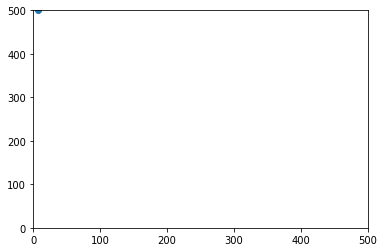

In [25]:
plt.scatter(matrix[np.argmax(accuracy),0], matrix[np.argmax(accuracy),1])
plt.ylim(0, 500)
plt.xlim(0, 500)

(0, 500)

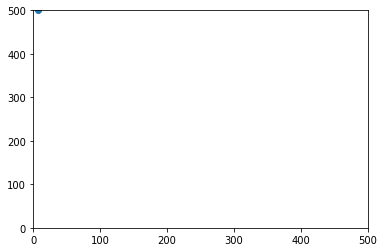

In [26]:
plt.scatter(matrix2[np.argmax(accuracy2),0], matrix[np.argmax(accuracy2),1])
plt.ylim(0, 500)
plt.xlim(0, 500)

# 5. Last question

Mmmm